In [143]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [145]:
 pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages (20.2.3)
Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [147]:
## data analysis and wrangling libraries
import pandas as pd
import numpy as np
import random as rnd

## visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## machine learning libraries
from sklearn.linear_model import LogisticRegression


In [148]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
combine = [train_df,test_df]


# analising data

In [149]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [150]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [152]:
train_df.info()
print("--"*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [153]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
train_df.describe(include=[ "O" ])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Newsom, Miss. Helen Monypeny",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


# analyse by pivoting features

In [155]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [156]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [157]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [158]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# analyse by visualising data

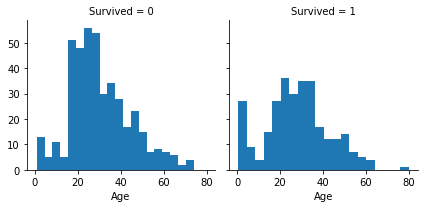

In [159]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)


c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


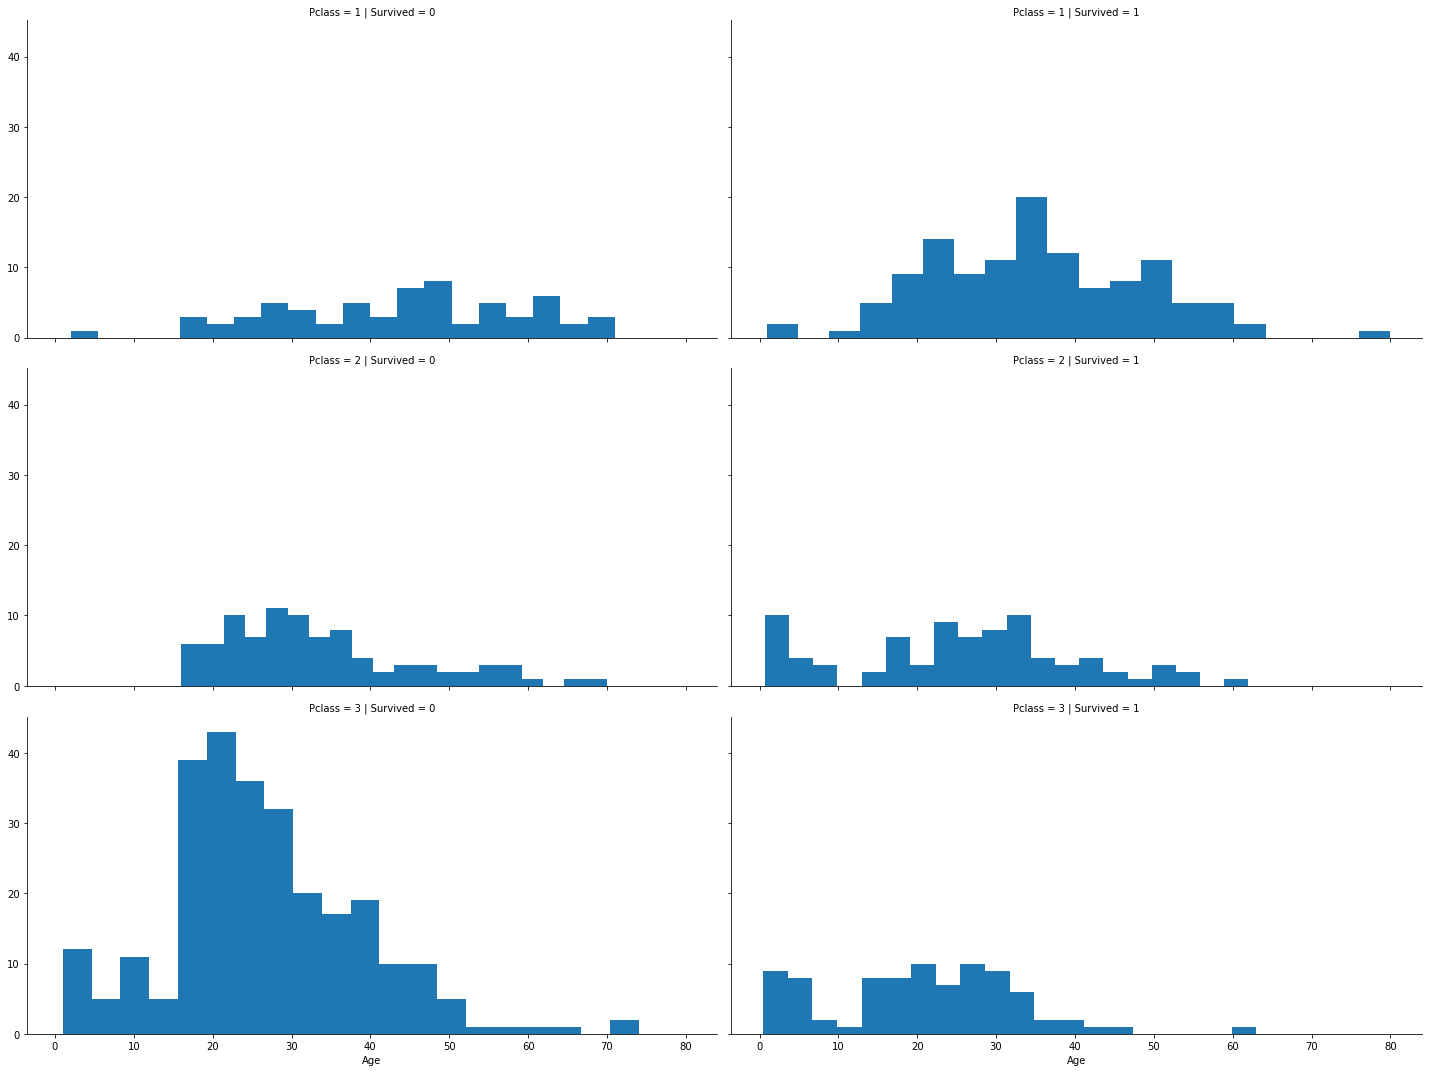

In [160]:
grid=sns.FacetGrid(train_df,col="Survived",row="Pclass",size=5,aspect=2)
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


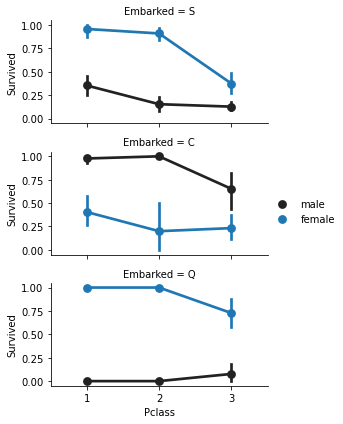

In [161]:
grid= sns.FacetGrid(train_df,"Embarked",size=2,aspect=2)
grid.map(sns.pointplot,"Pclass","Survived","Sex")
grid.add_legend()

c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


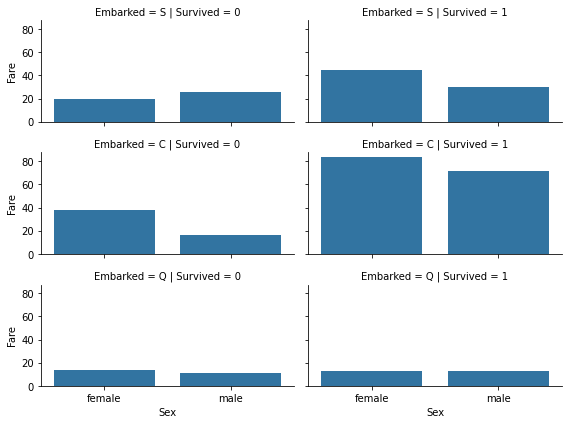

In [162]:
grid=sns.FacetGrid(train_df,row="Embarked",col="Survived",size=2,aspect=2)
grid.map(sns.barplot,"Sex","Fare",ci=None)

# Wrangle data


In [163]:
print("before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape) 
train_df=train_df.drop(["Ticket","Cabin"],axis=1)
test_df=test_df.drop(["Ticket","Cabin"],axis=1)
combine=[train_df,test_df]
print("after",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)
after (891, 10) (418, 9) (891, 10) (418, 9)


In [164]:
for data in combine:
    data["Title"]=data.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [165]:
for data in combine:
    data["Title"]=data["Title"].replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Lady","Major","Dona","Rev","Sir"],"Rare")

    data["Title"]=data["Title"].replace("Mlle","Miss")
    
    data["Title"]=data["Title"].replace("Ms","Miss")
    data["Title"]=data["Title"].replace("Mme","Mrs")

train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [166]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for data in combine:
    data["Title"]=data["Title"].map(title_mapping)
    data["Title"]=data["Title"].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [167]:
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]
print(train_df.shape,test_df.shape)

(891, 9) (418, 9)


In [168]:
for data in combine:
    data["Sex"]=data["Sex"].map({"male":0,"female":1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


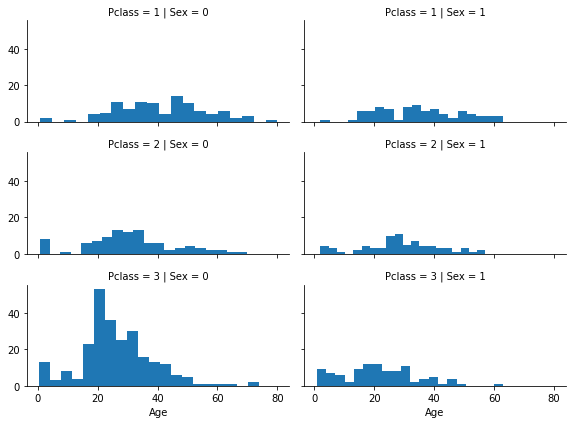

In [169]:
grid=sns.FacetGrid(train_df,row="Pclass",col="Sex",size=2,aspect=2)
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

In [170]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [171]:
for data in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=data[(data["Sex"]==i)&(data["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5 +0.5)*0.5
    for i in range(0,2):
        for j in range(0,3):
            data.loc[(data.Age.isnull())&(data.Sex==i)&(data.Pclass==j+1),"Age"]=guess_ages[i,j]
    data["Age"]=data["Age"].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [172]:
train_df["AgeBand"]=pd.cut(train_df["Age"],5)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],as_index=False).mean().sort_values(by="AgeBand",ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [173]:
for data in combine:
    data.loc[data["Age"]<=16,"Age"]=0
    data.loc[(data["Age"]>16) & (data["Age"]<=32),"Age"]=1
    data.loc[(data["Age"]>32) & (data["Age"]<=48),"Age"]=2
    data.loc[(data["Age"]>48) & (data["Age"]<=64),"Age"]=3
    data.loc[data["Age"]>64,"Age"]

train_df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [174]:
train_df=train_df.drop(["AgeBand"],axis=1)
combine=[train_df,test_df]
train_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [175]:
for data in combine:
    data["FamilySize"]=data["Parch"]+data["SibSp"]+1

train_df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [176]:
for data in combine:
    data["IsAlone"]=0
    data.loc[data["FamilySize"]==1,"IsAlone"]=1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"],as_index=False).mean()
combine=[train_df,test_df]

In [177]:

train_df=train_df.drop(["FamilySize","Parch","SibSp"],axis=1)
test_df=test_df.drop(["FamilySize","Parch","SibSp"],axis=1)

combine=[train_df,test_df]
train_df.head()



,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [178]:
for data in combine:
    data["Age*Class"]=data.Age*data.Pclass
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,S,1,0,3
1,1,1,1,2,71.2833,C,3,0,2
2,1,3,1,1,7.9250,S,2,1,3
3,1,1,1,2,53.1000,S,3,0,2
4,0,3,0,2,8.0500,S,1,1,6
5,0,3,0,1,8.4583,Q,1,1,3
6,0,1,0,3,51.8625,S,1,1,3
7,0,3,0,0,21.0750,S,4,0,0
8,1,3,1,1,11.1333,S,3,0,3
9,1,2,1,0,30.0708,C,3,0,0


In [179]:
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [180]:
for data in combine:
    data["Embarked"]=data["Embarked"].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [181]:
for data in combine:
    data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [182]:
freq_fare=test_df["Fare"].dropna().median()
test_df["Fare"].fillna(freq_fare,inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [183]:
train_df["FareBand"]=pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand",ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [184]:
for data in combine:
    data.loc[data["Fare"]<=7.91,"Fare"]=0
    data.loc[(data["Fare"]>7.91)&(data["Fare"]<=14.454),"Fare"]=1
    data.loc[(data["Fare"]>14.454)&(data["Fare"]<=31.0),"Fare"]=2
    data.loc[data["Fare"]>31.0,"Fare"]=3
    data["Fare"]=data["Fare"].astype(int)

train_df=train_df.drop(["FareBand"],axis=1)
combine=[train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [185]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# model predict and solving


In [186]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]

X_test=test_df.drop("PassengerId",axis=1).copy()

X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

# # # linear regression

In [188]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

80.36

In [190]:
submission=pd.DataFrame({"PassengerId":test_df["PassengerId"],"Survived":Y_pred})

submission.to_csv("gender_submission.csv",index=False)